In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import zscore
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
yelp = pd.read_excel("yelp.xlsx")

In [3]:
df = yelp.loc[:, ~yelp.columns.str.contains('^Unnamed')]

In [4]:
name = df["name"]

In [5]:
five_guys = df[name.str.contains("Five Guys")]["stars"]

In [6]:
five_guys.count()

102

In [7]:
chipotle = df[name.str.contains("Chipotle")]["stars"]

In [8]:
chipotle.count()

177

In [9]:
five_guys.describe()

count    102.000000
mean       3.612745
std        0.502010
min        2.500000
25%        3.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: stars, dtype: float64

In [10]:
chipotle.describe()

count    177.000000
mean       2.971751
std        0.623219
min        1.500000
25%        2.500000
50%        3.000000
75%        3.500000
max        4.500000
Name: stars, dtype: float64

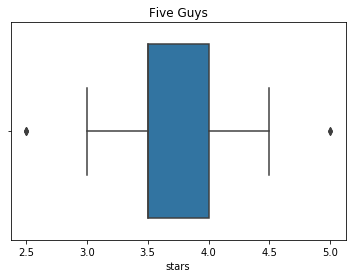

In [104]:

ax = sns.boxplot(five_guys).set_title('Five Guys')

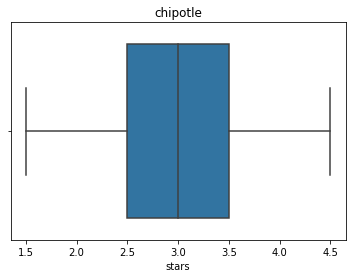

In [107]:
ax = sns.boxplot(chipotle).set_title("Chipotle")

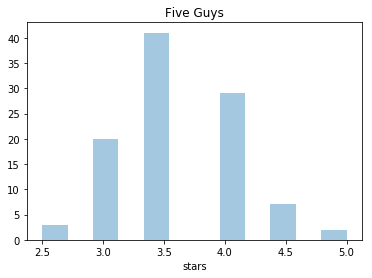

In [108]:
ax = sns.distplot(five_guys, kde = False).set_title("Five Guys")

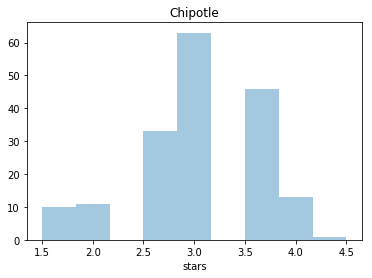

In [109]:
ax = sns.distplot(chipotle, kde = False).set_title("Chipotle")

In [79]:
chipotle = chipotle.reset_index(drop=True)
five_guys = five_guys.reset_index(drop=True)

In [100]:
def remove_outlier(series):
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1
    minBound = q1 - 1.5 * iqr
    maxBound = q3 + 1.5 * iqr
    print("Bounds: {0} to {1}".format(minBound, maxBound))
    mask = series.between(minBound, maxBound, inclusive=True)
    return series.loc[mask]

In [101]:
processed_five = remove_outlier(five_guys)
processed_chip = remove_outlier(chipotle)

Bounds: 2.75 to 4.75
Bounds: 1.0 to 5.0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


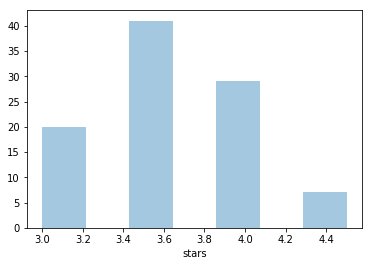

In [90]:
ax = sns.distplot(processed_five, kde = False)

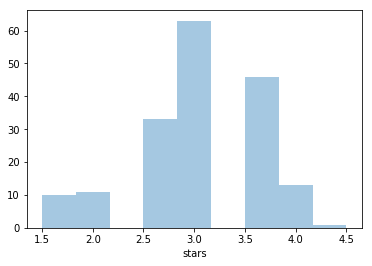

In [91]:
ax = sns.distplot(processed_chip, kde = False)

In [92]:
processed_five.describe()

count    97.000000
mean      3.618557
std       0.431647
min       3.000000
25%       3.500000
50%       3.500000
75%       4.000000
max       4.500000
Name: stars, dtype: float64

In [93]:
processed_chip.describe()

count    177.000000
mean       2.971751
std        0.623219
min        1.500000
25%        2.500000
50%        3.000000
75%        3.500000
max        4.500000
Name: stars, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


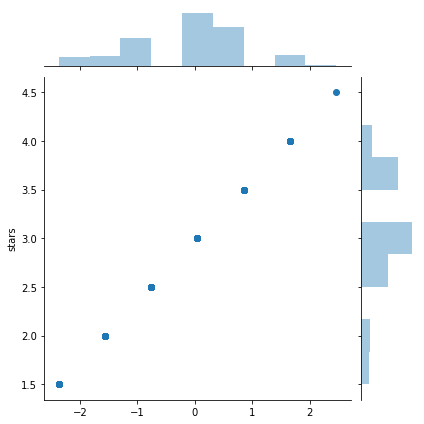

In [95]:
sns.jointplot(zscore(chipotle), chipotle)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


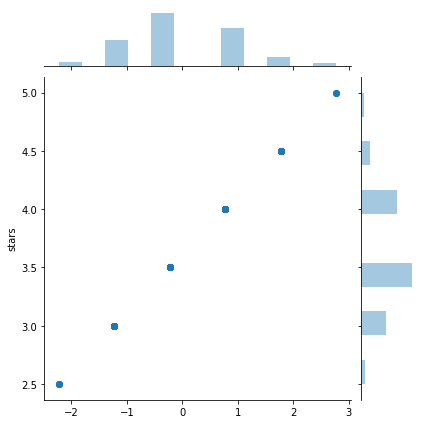

In [96]:
sns.jointplot(zscore(five_guys), five_guys)

In [99]:
np.mean(zscore(five_guys))

-1.0013776300540628e-16

In [110]:
np.median(zscore(five_guys))

-0.2256963759490042

In [111]:
np.median(zscore(chipotle))

0.04545548462715339